In [46]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import tensorflowjs as tfjs


from tensorflow.keras import applications
from tensorflow.keras import optimizers

datadir='/home/shashimal/Documents/dataset'
categories = ['dyed-lifted-polyps','dyed-resection-margins','esophagitis',
             'normal-cecum','normal-pylorus','normal-pylorus','polyps','ulcerative-colitis']


In [2]:
training_data=[]
def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(48,48))
#                 crop_array = new_array[0:96,35:96]
                training_data.append([new_array,class_num])
            except Exception as e:    
                pass
create_training_data()          

In [4]:
print(len(training_data))

8000


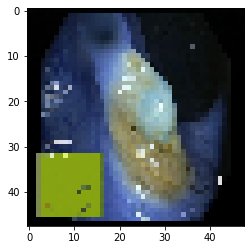

In [5]:
plt.imshow(training_data[0][0])
plt.show()

In [11]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(8000,48,48,3)
x.shape

(8000, 48, 48, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print(x_train.shape)

(6400, 48, 48, 3)


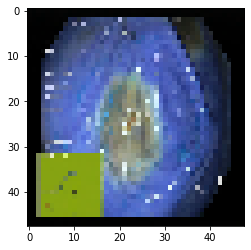

In [58]:
plt.imshow(x_train[0])
plt.show()

In [15]:
y_train = tf.keras.utils.to_categorical(y_train, 8)
y_test = tf.keras.utils.to_categorical(y_test, 8)

In [45]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (48, 48, 3))


80142336/80134624 [==============================] - 481s 6us/step


In [51]:
for layer in model.layers[:20]:
    layer.trainable = False
x = model.output
x =  tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(8, activation="softmax")(x)   
model_final = tf.keras.models.Model(model.input,predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

    

In [52]:
model_final.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 6400 samples, validate on 1600 samples
Epoch 1/5
6400/6400 [==============================] - 124s 19ms/sample - loss: 1.9324 - acc: 0.2614 - val_loss: 1.6353 - val_acc: 0.4081
Epoch 2/5
6400/6400 [==============================] - 132s 21ms/sample - loss: 1.5686 - acc: 0.4200 - val_loss: 1.3394 - val_acc: 0.5494
Epoch 3/5
6400/6400 [==============================] - 134s 21ms/sample - loss: 1.3486 - acc: 0.5083 - val_loss: 1.1407 - val_acc: 0.6106
Epoch 4/5
6400/6400 [==============================] - 134s 21ms/sample - loss: 1.1850 - acc: 0.5672 - val_loss: 1.0100 - val_acc: 0.6425
Epoch 5/5
6400/6400 [==============================] - 133s 21ms/sample - loss: 1.0745 - acc: 0.5959 - val_loss: 0.9252 - val_acc: 0.6425


In [16]:
def model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(48,48,3),activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(96,61,3),activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(8,activation=tf.nn.softmax)
        
    ])
    
    return model

In [17]:
model=model()

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0

In [19]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 6400 samples, validate on 1600 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
6400/6400 [==============================] - 37s 6ms/sample - loss: 2.0811 - acc: 0.1325 - val_loss: 2.0763 - val_acc: 0.2544
Epoch 2/5
6400/6400 [==============================] - 41s 6ms/sample - loss: 2.0713 - acc: 0.1562 - val_loss: 2.0698 - val_acc: 0.2525
Epoch 3/5
6400/6400 [==============================] - 41s 6ms/sample - loss: 2.0611 - acc: 0.1700 - val_loss: 2.0629 - val_acc: 0.2481
Epoch 4/5
6400/6400 [==============================] - 41s 6ms/sample - loss: 2.0499 - acc: 0.1920 - val_loss: 2.0554 - val_acc: 0.2481
Epoch 5/5
6400/6400 [==============================] - 42s 7ms/sample - loss: 2.0368 - acc: 0.2181 - val_loss: 2.0468 - val_acc: 0.2481


In [53]:
score = model_final.evaluate(x_test, y_test, verbose=0)

In [54]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9252419972419739
Test accuracy: 0.6425


In [55]:
predictions=model_final.predict(x_test)
predictions[10]

array([0.3882518 , 0.35776964, 0.0286979 , 0.02123157, 0.07629111,
       0.00747047, 0.07118094, 0.04910658], dtype=float32)

In [56]:
import numpy as np
np.argmax(predictions[10])

0

In [57]:
y_test[10]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
tfjs_target_dir='/home/shashimal/Documents'
tfjs.converters.save_keras_model(model, tfjs_target_dir)